In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [34]:
df= pd.read_csv('Country_Dataset.csv')
df
df.head()
df.tail()
df.dropna(inplace= True)
df.drop_duplicates(inplace= True)
df.isnull().sum()
df.shape
df.info()
df.describe(                                                                                                                        )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

In [36]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df.iloc[:, :] = min_max.fit_transform(df.iloc[:, :])

C:\Users\AL-HAMD\AppData\Local\Temp\ipykernel_8624\2576231649.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.0060241  0.01204819 0.01807229 0.02409639 0.03012048
 0.03614458 0.04216867 0.04819277 0.05421687 0.06024096 0.06626506
 0.07228916 0.07831325 0.08433735 0.09036145 0.09638554 0.10240964
 0.10843373 0.11445783 0.12048193 0.12650602 0.13253012 0.13855422
 0.14457831 0.15060241 0.15662651 0.1626506  0.1686747  0.1746988
 0.18072289 0.18674699 0.19277108 0.19879518 0.20481928 0.21084337
 0.21686747 0.22289157 0.22891566 0.23493976 0.24096386 0.24698795
 0.25301205 0.25903614 0.26506024 0.27108434 0.27710843 0.28313253
 0.28915663 0.29518072 0.30120482 0.30722892 0.31325301 0.31927711
 0.3253012  0.3313253  0.3373494  0.34337349 0.34939759 0.35542169
 0.36144578 0.36746988 0.37349398 0.37951807 0.38554217 0.39156627
 0.39759036 0.40361446 0.40963855 0.41566265 0.42168675 0.42771084
 0.43373494

In [37]:
X = df.iloc[:, :].values

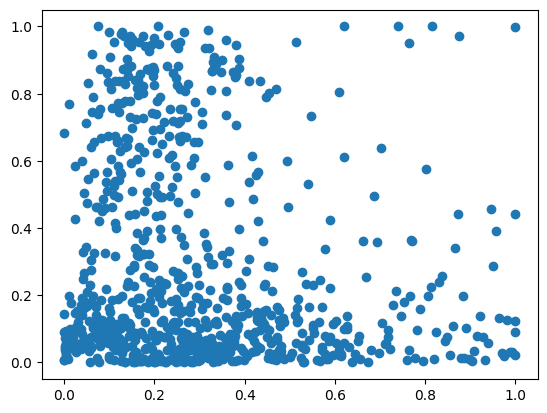

In [38]:
plt.scatter(X[:, 0:5], X[:,5:10])

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [130.0, 130.0, 152.5, 152.5],
  [93.75, 93.75, 141.25, 141.25],
  [62.5, 62.5, 117.5, 117.5],
  [40.0, 40.0, 90.0, 90.0],
  [20.0, 20.0, 65.0, 65.0],
  [5.0, 5.0, 42.5, 42.5],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [223.75, 223.75, 270.0, 270.0],
  [183.75, 183.75, 246.875, 246.875],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [310.0, 310.0, 332.5, 332.5],
  [365.0, 365.0, 375.0, 

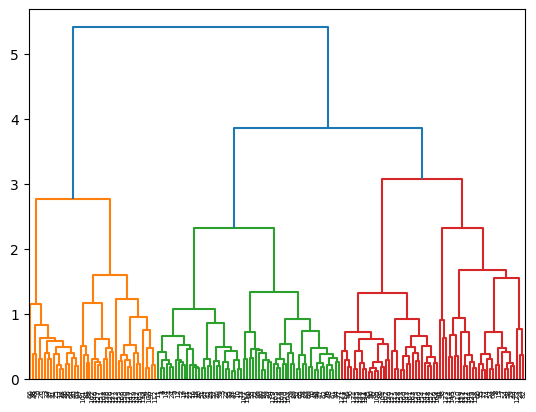

In [39]:
dend = sch.dendrogram(sch.linkage(X, method= 'ward'))
dend

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_scaled = pca.fit_transform(X)

In [45]:
pca_scaled.shape

(167, 2)

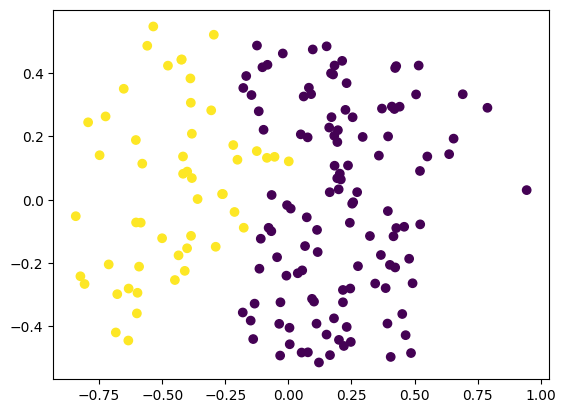

In [47]:
plt.scatter(pca_scaled[:,0], pca_scaled[:, 1], c= agloc.fit_predict(pca_scaled))

In [ ]:
agloc = AgglomerativeClustering(n_clusters= 2 , linkage= 'ward')
y_pred = agloc.fit_predict(X)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)